In [1]:
#since noteboke doesn't work in jupiterlabs    %matplotlib notebook 
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('D:\\6OHDA\\')
#import mpld3
#mpld3.enable_notebook()
import numpy as np
import scipy as sci
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as Mcolors
import matplotlib.cm as cmx
import sys
import h5py
from IO import *
from utils import *
from plotUtils import *
from ColorSchems import colorPallet as CP
import pptx
from pptx import Presentation 
from pptx.util import Inches
from io import BytesIO
import re
import warnings
import pandas as pd
import sqlalchemy as db
import gc
from tqdm import tqdm
import seaborn as sns
import pywt # wavelet package
import matplotlib.cm as cm

In [3]:
Files = ['FinalData_6OHDA.h5','FinalData_6OHDA_H.h5','FinalData_6OHDA_H_skip.h5','FinalData_6OHDA_skip.h5']
miceList = getMiceList(Files[0])

In [4]:
#path to folder where figures should be saved
figFolder = 'D:\\6OHDA\\chapter2\\'

In [5]:
def periodCalc(day):
    if day== 0:
        return 'Healthy'
    elif day<13:
        return 'Acute' #day 1-13
    else:
        return 'Chronic' #day 14-35

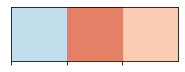

In [6]:
# set color pallet:
a3 = np.array(sns.color_palette("RdBu_r", n_colors=7))
# colorPallet3 =(a3[[2,6,5],:])
colorPallet3 =(a3[[2,5,4],:])
sns.palplot(sns.color_palette(colorPallet3))

In [7]:
# f = h5py.File('J:\\connactivityAnalysis\\connMapsMvmt.hdf5','a')
connMaps = 'J:\\connactivityAnalysis\\connMapsMvmt.hdf5'

<h3> Check number of edges in high vs. low mvmt </h3>

In [17]:
f = h5py.File(connMaps,'r')
col_names = ['Mouse','Sess','Day','numred','Period','population','mvmt','Property','corrType']
df = pd.DataFrame(columns = col_names)
for m in f.keys():
    for sess in f[m].keys():
        for mvmt in f[m][sess]['Pre'].keys():
            try:
                numred = f[m][sess].attrs['numRed']
                cre = getCreType(Files[1],m)
                tempDict = {'Mouse':m,'Sess':sess,'Day':f[m][sess].attrs['day'],
                            'numred':numred,'Period':f[m][sess].attrs['period']}
                for cType in ['pearson','pearsonF','aSymCorr']:
                    c = f[m][sess]['Pre'][mvmt][cType].value 
                    c[np.tril(c,-1)==0] = np.nan

                    d = f[m][sess]['Pre'][mvmt][(cType+'_shuffle')].value
                    b = np.nanpercentile(d,[97.5,2.5],axis=2)

                    nSig = (c>b[0,:,:])|(c<b[1,:,:])
                    cSig = np.copy(c)
                    cSig[nSig] = np.nan
                    noSig = np.copy(c)
                    noSig[~nSig] = np.nan

                    if numred > 1:
                        tempDict['population'] = cre+'-'+cre
                        tempDict['corrType'] = cType
                        tempDict['mvmt'] = mvmt
                        tempDict['sigPercent'] = np.nansum(nSig[:numred,:numred]==1)/np.nansum(np.isnan(c[:numred,:numred])==0)
                        df2 = pd.DataFrame([tempDict])
                        df = pd.concat([df,df2],sort=True)
                    if numred > 0:
                        tempDict['population'] = cre+'-'+cre
                        tempDict['corrType'] = cType
                        tempDict['mvmt'] = mvmt
                        tempDict['sigPercent'] = np.nansum(nSig[numred:,:numred]==1)/np.nansum(np.isnan(c[numred:,:numred])==0)

                        df2 = pd.DataFrame([tempDict])
                        df = pd.concat([df,df2],sort=True)                    

                    tempDict['population'] = cre+'-'+cre
                    tempDict['corrType'] = cType
                    tempDict['mvmt'] = mvmt
                    tempDict['sigPercent'] = np.nansum(nSig[numred:,numred:]==1)/np.nansum(np.isnan(c[numred:,numred:])==0)
                    df2 = pd.DataFrame([tempDict])
                    df = pd.concat([df,df2],sort=True)    
    # 
            except Exception as e:
                exc_type, exc_obj, exc_tb = sys.exc_info()
                print(sess,'-',mvmt,exc_tb.tb_lineno,c.shape)
f.close()
df.to_csv(figFolder+'mvmtNetWork.csv')

<ipython-input-17-095a45ac06d1>:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  c = f[m][sess]['Pre'][mvmt][cType].value
<ipython-input-17-095a45ac06d1>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  d = f[m][sess]['Pre'][mvmt][(cType+'_shuffle')].value
C:\Users\dzemel\Miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-17-095a45ac06d1>:36: RuntimeWarning: invalid value encountered in long_scalars
  tempDict['sigPercent'] = np.nansum(nSig[numred:,:numred]==1)/np.nansum(np.isnan(c[numred:,:numred])==0)
<ipython-input-17-095a45ac06d1>:44: RuntimeWarning: invalid value encountered in long_scalars
  tempDict['sigPercent'] = np.nansum(nSig[numred:,numred:]==1)/np.nansum(np.isnan(c[numred:,numred:])==0)
<ipython-input-17-095a45ac06d1>:29: RuntimeWarning: invalid value encountered in l

0761_day31A - highIpsi 14 ()
0761_day35L - hiSpeed 14 ()
0761_day35L - highIpsi 14 ()
1208_day2 - highIpsi 14 ()
1208_day30A - highIpsi 14 ()
1208_day34L - highIpsi 14 ()
1222_day2 - hiSpeed 14 ()
1222_day2 - highContra 14 ()
1222_day2 - highIpsi 14 ()
1222_day2 - lowRot 14 ()
1222_day2 - lowSpeed 14 ()
1222_day2 - totRot 14 ()
1236_day15A - highContra 14 ()
1236_day19L - highContra 14 ()
1236_day30A - highContra 14 ()
2980_day19L - highIpsi 14 ()
2981_day2 - highContra 14 ()
4539_day1 - highContra 14 ()
4539_day1 - highIpsi 14 ()
4539_day1 - totRot 14 ()
4539_day10 - highContra 14 ()
4539_day10 - highIpsi 14 ()
4539_day10 - totRot 14 ()
4539_day11 - highContra 14 ()
4539_day11 - highIpsi 14 ()
4539_day11 - totRot 14 ()
4539_day12 - highContra 14 ()
4539_day12 - highIpsi 14 ()
4539_day12 - totRot 14 ()
4539_day13 - highContra 14 ()
4539_day13 - highIpsi 14 ()
4539_day13 - totRot 14 ()
4539_day14 - highContra 14 ()
4539_day14 - highIpsi 14 ()
4539_day14 - totRot 14 ()
4539_day2 - highCo

In [16]:
df

,Day,Mouse,PercentEdges,Period,Property,Sess,corrType,mvmt,numred,population,sigPercent
0,0,0761,NaN,Healthy,NaN,0761_BaselineA,pearson,hiSpeed,1,CHI-CHI,0.000000
0,0,0761,NaN,Healthy,NaN,0761_BaselineA,pearson,hiSpeed,1,CHI-CHI,0.200000
0,0,0761,NaN,Healthy,NaN,0761_BaselineA,pearsonF,hiSpeed,1,CHI-CHI,0.038462
0,0,0761,NaN,Healthy,NaN,0761_BaselineA,pearsonF,hiSpeed,1,CHI-CHI,0.415385
0,0,0761,NaN,Healthy,NaN,0761_BaselineA,aSymCorr,hiSpeed,1,CHI-CHI,NaN
...,...,...,...,...,...,...,...,...,...,...,...
0,8,8815,1.0,Acute,NaN,8815_day8,pearsonF,totRot,3,CHI-CHI,0.546816
0,8,8815,1.0,Acute,NaN,8815_day8,pearsonF,totRot,3,CHI-CHI,0.453691
0,8,8815,NaN,Acute,NaN,8815_day8,aSymCorr,totRot,3,CHI-CHI,0.453691
0,8,8815,NaN,Acute,NaN,8815_day8,aSymCorr,totRot,3,CHI-CHI,NaN
